#Paquetes necesarios

Podremos hacer uso del mismo *environment* de la primera práctica, aunque en ocasiones pedirá instalar Pillow

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

Máximo número de píxeles blancos en una fila: 56100 con posición: 12

La fila núermo: 6 con valor: [51765] es superior al 90% del máximo
La fila núermo: 12 con valor: [56100] es superior al 90% del máximo
La fila núermo: 15 con valor: [52020] es superior al 90% del máximo
La fila núermo: 20 con valor: [51000] es superior al 90% del máximo
La fila núermo: 21 con valor: [51255] es superior al 90% del máximo
La fila núermo: 88 con valor: [50745] es superior al 90% del máximo
La fila núermo: 100 con valor: [54060] es superior al 90% del máximo


(0.0, 512.0)

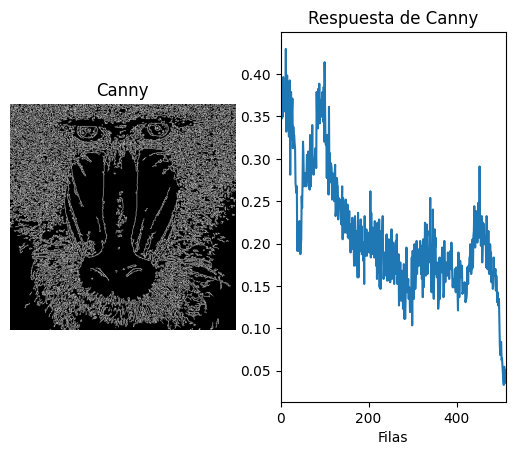

In [23]:
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)

col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * canny.shape[0])

#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
rows = row_counts.flatten() / (255 * canny.shape[1])

max_row = np.max(row_counts)
max_idx = np.argmax(row_counts)
print("Máximo número de píxeles blancos en una fila:", max_row, "con posición:", max_idx)
print()

for i, val in enumerate(row_counts):
    if val >= max_row * 0.9:
        print("La fila núermo:", i, "con valor:", val, "es superior al 90% del máximo")

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Máximo número de píxeles blancos en una fila: 55080 con posición: 83
La fila núermo: 2 con valor: [51765] es superior al 90% del máximo
La fila núermo: 3 con valor: [53550] es superior al 90% del máximo
La fila núermo: 4 con valor: [54315] es superior al 90% del máximo
La fila núermo: 5 con valor: [50490] es superior al 90% del máximo
La fila núermo: 8 con valor: [54570] es superior al 90% del máximo
La fila núermo: 11 con valor: [51510] es superior al 90% del máximo
La fila núermo: 12 con valor: [52020] es superior al 90% del máximo
La fila núermo: 19 con valor: [49980] es superior al 90% del máximo
La fila núermo: 20 con valor: [51000] es superior al 90% del máximo
La fila núermo: 24 con valor: [53550] es superior al 90% del máximo
La fila núermo: 51 con valor: [51255] es superior al 90% del máximo
La fila núermo: 80 con valor: [51510] es superior al 90% del máximo
La fila núermo: 81 con valor: [51000] es superior al 90% del máximo
La fila núermo: 82 con valor: [53295] es superior al

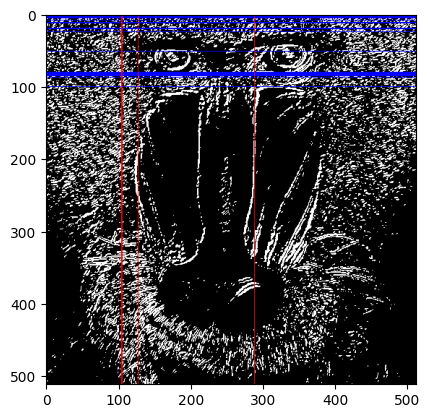

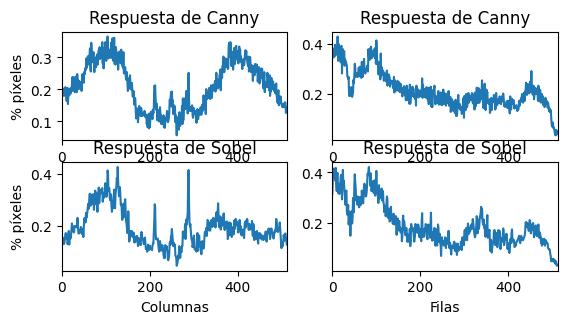

In [ ]:

ggris = cv2.GaussianBlur(gris, (3, 3), 0)
#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel_old = cv2.add(sobelx, sobely)
sobel8 = cv2.convertScaleAbs(sobel_old)

#Define valor umbral
valorUmbral = 100 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
_, sobel = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)
row_counts = cv2.reduce(sobel, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts = cv2.reduce(sobel, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
sobel_color = cv2.cvtColor(sobel, cv2.COLOR_GRAY2BGR)

cols_sobel = col_counts[0] / (255 * canny.shape[1])
rows_sobel = row_counts.flatten() / (255 * canny.shape[1])


max_row = np.max(row_counts)
max_idx = np.argmax(row_counts)
print("Máximo número de píxeles blancos en una fila:", max_row, "con posición:", max_idx)

for i, val in enumerate(row_counts):
    if val >= max_row * 0.9:
        print("La fila núermo:", i, "con valor:", val, "es superior al 90% del máximo")
        cv2.line(sobel_color, (0, i), (sobel_color.shape[1]-1, i), (0,0,255), 1)

max_col = np.max(col_counts)
max_idc = np.argmax(col_counts)
print("Máximo número de píxeles blancos en una columna:", max_col, "con posición:", max_idc)

for i, val in enumerate(col_counts[0]):
    if val >= max_col * 0.9:
        print("La columna núermo:", i, "con valor:", val, "es superior al 90% del máximo")
        cv2.line(sobel_color, (i, 0), (i, sobel_color.shape[0]-1), (255,0,0), 1) 

#Muestra resultado
plt.imshow(sobel_color, cmap='gray')
plt.show()


plt.figure()
plt.subplot(3, 2, 1)
plt.title("Respuesta de Canny")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

plt.subplot(3, 2, 2)
plt.title("Respuesta de Canny")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

plt.subplot(3, 2, 3)
plt.title("Respuesta de Sobel")
plt.ylabel("% píxeles")
plt.xlabel("Columnas")
plt.plot(cols_sobel)
#Rango en x definido por las columnas
plt.xlim([0, sobel.shape[1]])

plt.subplot(3, 2, 4)
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.plot(rows_sobel)
#Rango en x definido por las columnas
plt.xlim([0, sobel.shape[1]])

plt.show()



TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [7]:
vid = cv2.VideoCapture(0, cv2.CAP_DSHOW)

modo = 0  # Estado inicial (pestaña 0)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    # Según el modo, aplicamos algo distinto
    if modo == 0:
        vista = frame.copy()
        cv2.putText(vista, "Modo 0: Normal", (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (0, 255, 0), 2, cv2.LINE_AA)
    elif modo == 1:
        vista = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        vista = cv2.cvtColor(vista, cv2.COLOR_GRAY2BGR)  # para mostrar en color
        cv2.putText(vista, "Modo 1: Grises", (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (255, 0, 0), 2, cv2.LINE_AA)
    elif modo == 2:
        vista = cv2.Canny(frame, 100, 200)
        vista = cv2.cvtColor(vista, cv2.COLOR_GRAY2BGR)  
        cv2.putText(vista, "Modo 2: Bordes", (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow("Camara", vista)

    # Teclas de control
    key = cv2.waitKey(20)

    if key == 27:  # ESC para salir
        break
    elif key == ord('m'):  # 'm' para cambiar de modo
        modo = (modo + 1) % 3  # Va rotando entre 0,1,2

vid.release()
cv2.destroyAllWindows()


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.